In [1]:
#https://www.investopedia.com/terms/v/vwap.asp
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('./marketdata/zsh20.csv')
dataset_chy = pd.read_csv('./marketdata/DEXCHUS.csv')
dataset_train = pd.merge(dataset_train, dataset_chy,  left_on='Time', right_on='Time', how='left')
dataset_dxy = pd.read_csv('./marketdata/DTWEXB.csv')
dataset_train = pd.merge(dataset_train, dataset_dxy,  left_on='Time', right_on='Time', how='left')
dataset_corn = pd.read_csv('./marketdata/zch20_daily_price-history-11-02-2019.csv')
dataset_train = pd.merge(dataset_train, dataset_corn,  left_on='Time', right_on='Time', how='left')
#dataset_train = dataset_train[dataset_train["Volume"] != 0]
#dataset_train = dataset_train.iloc[21:] #remove first 21 rows
dataset_train.Time = pd.to_datetime(dataset_train.Time.str.replace('D', 'T'))
dataset_train = dataset_train.sort_values('Time')
dataset_train.set_index('Time', inplace=True)
dataset_train.rename(columns={"DTWEXB": "USD", "DEXCHUS": "YUAN", "Last": "SOYCLS", "Last_Corn": "CORNCLS"}, inplace=True)
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 490 entries, 2017-11-15 to 2019-10-25
Data columns (total 16 columns):
Open             490 non-null float64
High             490 non-null float64
Low              490 non-null float64
SOYCLS           490 non-null float64
Change           490 non-null float64
Volume           490 non-null int64
Open Int         490 non-null int64
YUAN             490 non-null float64
USD              490 non-null float64
Open_Corn        469 non-null float64
High_Corn        469 non-null float64
Low_Corn         469 non-null float64
CORNCLS          469 non-null float64
Change_Corn      469 non-null float64
Volume_Corn      469 non-null float64
Open Int_Corn    469 non-null float64
dtypes: float64(14), int64(2)
memory usage: 65.1 KB


In [2]:
# Importing the training set
dataset_tweet = pd.read_csv('./marketdata/tweetsentimentwithentities.csv')
dataset_tweet.drop(['id_str', 'source', 'SrNo'], axis=1, inplace=True)
dataset_tweet.rename(columns={"created_at": "Time"}, inplace=True)
dataset_tweet.Time = pd.to_datetime(dataset_tweet.Time.str.replace('D', 'T'))
dataset_tweet = dataset_tweet.sort_values('Time')
dataset_tweet.reset_index(inplace=True)
dataset_tweet["twt_sen"] = dataset_tweet["score"] * dataset_tweet["magnitude"]
dataset_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 18 columns):
index               1474 non-null int64
Tweet category      1474 non-null object
text                1474 non-null object
Time                1474 non-null datetime64[ns]
retweet_count       1474 non-null int64
favorite_count      1474 non-null int64
is_retweet          1474 non-null bool
score               1474 non-null float64
magnitude           1474 non-null float64
china               1474 non-null int64
chinasalience       1474 non-null float64
soybeans            1474 non-null int64
soybeanssalience    1474 non-null float64
tarrif              1474 non-null int64
ttrrifsalience      1474 non-null float64
trade               1474 non-null int64
tradesalience       1474 non-null float64
twt_sen             1474 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(7), int64(7), object(2)
memory usage: 197.3+ KB


In [3]:
dataset_tweet_byday = dataset_tweet.groupby('Time').mean()
dataset_tweet_byday.drop(['index'], axis=1, inplace=True)
#dataset_tweet_byday['Time'] = dataset_tweet_byday.index
dataset_tweet_byday.reset_index(inplace=True)
dataset_tweet_byday.head()

,Time,retweet_count,favorite_count,is_retweet,score,magnitude,china,chinasalience,soybeans,soybeanssalience,tarrif,ttrrifsalience,trade,tradesalience,twt_sen
0,2011-01-27,73.0,26.0,0.0,0.1,0.2,1.0,0.035307,0.0,0.0,0.0,0.0,0.0,0.0,0.02
1,2011-07-18,398.0,32.0,0.0,0.1,0.3,1.0,0.050781,0.0,0.0,0.0,0.0,0.0,0.0,0.03
2,2011-07-19,406.0,50.0,0.0,-0.4,0.4,1.0,0.546543,0.0,0.0,0.0,0.0,0.0,0.0,-0.16
3,2011-07-20,123.0,19.0,0.0,-0.3,0.3,1.0,0.478453,0.0,0.0,0.0,0.0,0.0,0.0,-0.09
4,2011-07-27,179.0,31.0,0.0,0.2,0.2,1.0,0.595857,0.0,0.0,0.0,0.0,0.0,0.0,0.04


In [4]:
# Importing the training set
dataset_news = pd.read_csv('./marketdata/agr_sentiment.csv')
dataset_news.rename(columns={'Sr No': "SrNo", 'date': "Time"}, inplace=True)
#dataset_news.drop(['SrNo'], axis=1, inplace=True)
dataset_news.Time = pd.to_datetime(dataset_news.Time.str.replace('D', 'T'))
dataset_news = dataset_news.sort_values('Time')
dataset_news.reset_index(inplace=True)
dataset_news["news_sen"] = dataset_news["score"] * dataset_news["magnitude"]
dataset_news.tail()

,index,newsheadline,Time,newsdata,score,magnitude,china,chinasalience,brazil,brazilsalience,...,tradesalience,pork,porksalience,weather,weathersalience,trump,trumpsalience,disease,diseasesalience,news_sen
3112,1099,"China reopens Canadian beef, pork trade after ...",2019-11-06,China has reopened its beef and pork import tr...,-0.3,4.6,12,0.379941,0,0.000000,...,0.0,3,0.00185,0,0.000000,0,0.0,0,0.0,-1.38
3113,1999,"China soybean stocks fall further, soymeal sto...",2019-11-07,Brazilâ€™s drive to decarbonise its liquid fue...,0.0,3.0,0,0.000000,7,0.272646,...,0.0,0,0.00000,0,0.000000,0,0.0,0,0.0,0.00
3114,410,"China soybean stocks fall further, soymeal sto...",2019-11-07,Soybean stocks in China fell to a new low of 4...,-0.1,1.1,2,0.034375,0,0.000000,...,0.0,0,0.00000,0,0.000000,0,0.0,0,0.0,-0.11
3115,2929,Brazilâ€™s biofuel mandate to hike soyoil cons...,2019-11-07,Brazilâ€™s drive to decarbonise its liquid fue...,0.0,3.0,0,0.000000,7,0.272646,...,0.0,0,0.00000,0,0.000000,0,0.0,0,0.0,0.00
3116,1774,US-China trade deal unlikely to be a 'big fix'...,2019-11-07,A phase one trade deal between the US and Chin...,0.0,3.5,2,0.016314,2,0.003134,...,0.0,0,0.00000,1,0.001427,0,0.0,0,0.0,0.00


In [28]:
dataset_news_byday = dataset_news.groupby('Time').sum()
dataset_news_byday.drop(['index'], axis=1, inplace=True)
#dataset_tweet_byday['Time'] = dataset_tweet_byday.index
dataset_news_byday.reset_index(inplace=True)
dataset_news_byday.head()

,Time,score,magnitude,china,chinasalience,brazil,brazilsalience,argentina,argentinasalience,soybean,...,tradesalience,pork,porksalience,weather,weathersalience,trump,trumpsalience,disease,diseasesalience,news_sen
0,2017-11-20,-0.2,12.9,0,0.000000,1,0.036625,3,0.006239,6,...,0.021678,0,0.0,2,0.062343,0,0.0,0,0.0,-1.10
1,2017-11-21,0.0,12.3,1,0.002051,5,0.020473,8,0.062136,10,...,0.037144,0,0.0,5,0.003837,0,0.0,0,0.0,0.48
2,2017-11-22,-0.6,10.7,4,0.044156,3,0.003309,1,0.002506,5,...,0.033213,0,0.0,0,0.000000,0,0.0,0,0.0,-1.83
3,2017-11-23,-0.3,9.1,2,0.005889,2,0.005881,2,0.100795,2,...,0.006278,0,0.0,1,0.021759,0,0.0,0,0.0,-0.80
4,2017-11-24,-0.1,2.6,1,0.001646,2,0.035171,1,0.032929,4,...,0.000000,0,0.0,0,0.000000,0,0.0,0,0.0,-0.17


In [6]:
dts = dataset_tweet_byday[['Time','twt_sen']]
#dts.drop_duplicates(subset=['A'])
dtn = dataset_news_byday[['Time','news_sen']]

In [7]:
data = pd.merge(dataset_train, dts,  left_on='Time', right_on='Time', how='left')
data = pd.merge(data, dtn,  left_on='Time', right_on='Time', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 19 columns):
Time             490 non-null datetime64[ns]
Open             490 non-null float64
High             490 non-null float64
Low              490 non-null float64
SOYCLS           490 non-null float64
Change           490 non-null float64
Volume           490 non-null int64
Open Int         490 non-null int64
YUAN             490 non-null float64
USD              490 non-null float64
Open_Corn        469 non-null float64
High_Corn        469 non-null float64
Low_Corn         469 non-null float64
CORNCLS          469 non-null float64
Change_Corn      469 non-null float64
Volume_Corn      469 non-null float64
Open Int_Corn    469 non-null float64
twt_sen          132 non-null float64
news_sen         476 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(2)
memory usage: 76.6 KB


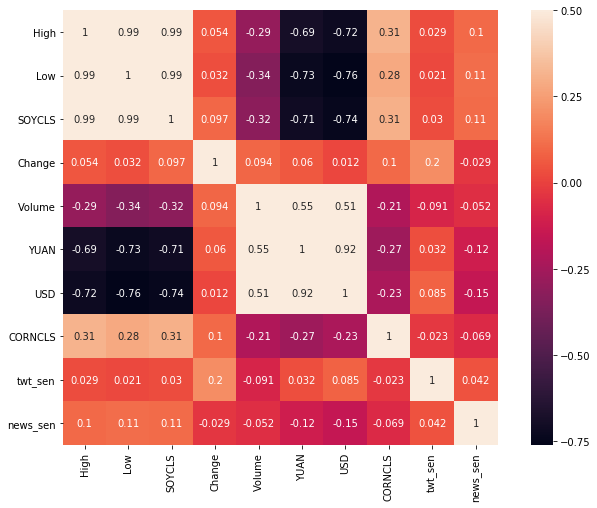

In [8]:
import seaborn as sns
#df_val = dataset_train[dataset_train.Time >= "01-03-2018"]
fcol = [c for c in data.columns if c not in ['Open','Open Int', 'Open_Corn', 'High_Corn', 
                                                      'Low_Corn', 'Change_Corn', 'Volume_Corn', 'Open Int_Corn' ]]

C_mat = data[fcol].corr()
fig = plt.figure(figsize=(12,8))
sns.heatmap(C_mat,vmax=0.5,square=True,annot=True)
plt.show()

In [9]:
data = data[fcol]
data.columns

Index(['Time', 'High', 'Low', 'SOYCLS', 'Change', 'Volume', 'YUAN', 'USD',
       'CORNCLS', 'twt_sen', 'news_sen'],
      dtype='object')

In [10]:
training_set = data.iloc[:, 1:12].values
training_time = data.iloc[:, 0:1].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

In [11]:
def calc_feat(sequence, n_steps_in):
    X= []
    for i in range(n_steps_in, len(sequence)):
        vwap = 0
        vol = 0
        vchg = 0
        for j in range(n_steps_in):
            if (j+i<sequence.shape[0]):
                vwap += (((np.sum(sequence[j+i, 1:4]))/3) * sequence[j+i, 5])
                vchg += (((sequence[j+i, 4])) * sequence[j+i, 5])
                vol += sequence[j+i, 5]
        #if vwap !=0  and vol != 0:
        X = np.append(X, vwap/vol)
        X = np.append(X, vchg/vol)
    
    sz = sequence.shape[0]-n_steps_in
    X = np.array(X.reshape(sz,2)) 
    #X = X[:-(n_steps_out-1), :]
    return X

X_feat = calc_feat(training_set_scaled, n_steps_in=1)
X_feat.shape

(489, 2)

In [12]:
training_set_scaled = training_set_scaled[:-1, :]
training_set_scaled.shape

(489, 10)

In [13]:
#Concate features
from numpy import hstack
X_feat = hstack((training_set_scaled, X_feat))

In [14]:
training_time = training_time[:-1, :]

In [15]:
cols = data.columns.values
cols = np.append(cols, "vwap")
cols = np.append(cols, "vol")
val = 'Time'
cols = cols.tolist()
if val in cols: cols.remove(val)
print(cols)

['High', 'Low', 'SOYCLS', 'Change', 'Volume', 'YUAN', 'USD', 'CORNCLS', 'twt_sen', 'news_sen', 'vwap', 'vol']


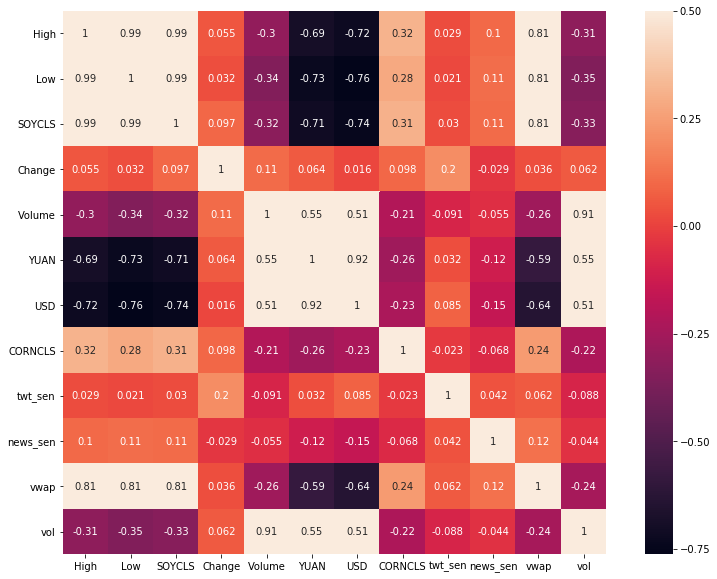

In [16]:
datafr = pd.DataFrame(X_feat, columns=cols)
#datafr.isna().sum()
C_mat = datafr.corr()
fig = plt.figure(figsize=(14,10))
sns.heatmap(C_mat,vmax=0.5,square=True,annot=True)
plt.show()

In [17]:
time  = pd.DataFrame(training_time)
time[0]

0     2017-11-15
1     2017-11-16
2     2017-11-17
3     2017-11-20
4     2017-11-21
5     2017-11-22
6     2017-11-24
7     2017-11-27
8     2017-11-28
9     2017-11-29
10    2017-11-30
11    2017-12-01
12    2017-12-04
13    2017-12-05
14    2017-12-06
15    2017-12-07
16    2017-12-08
17    2017-12-11
18    2017-12-12
19    2017-12-13
20    2017-12-14
21    2017-12-15
22    2017-12-18
23    2017-12-19
24    2017-12-20
25    2017-12-21
26    2017-12-22
27    2017-12-26
28    2017-12-27
29    2017-12-28
         ...    
459   2019-09-13
460   2019-09-16
461   2019-09-17
462   2019-09-18
463   2019-09-19
464   2019-09-20
465   2019-09-23
466   2019-09-24
467   2019-09-25
468   2019-09-26
469   2019-09-27
470   2019-09-30
471   2019-10-01
472   2019-10-02
473   2019-10-03
474   2019-10-04
475   2019-10-07
476   2019-10-08
477   2019-10-09
478   2019-10-10
479   2019-10-11
480   2019-10-14
481   2019-10-15
482   2019-10-16
483   2019-10-17
484   2019-10-18
485   2019-10-21
486   2019-10-

In [18]:
datafr["Time"] = pd.to_datetime(time[0])
datafr.to_csv("soycausal_factors.csv")

(490, 15)
['Open', 'High', 'Low', 'SOYCLS', 'Change', 'Volume', 'Open Int', 'USD', 'CORNCLS', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear']


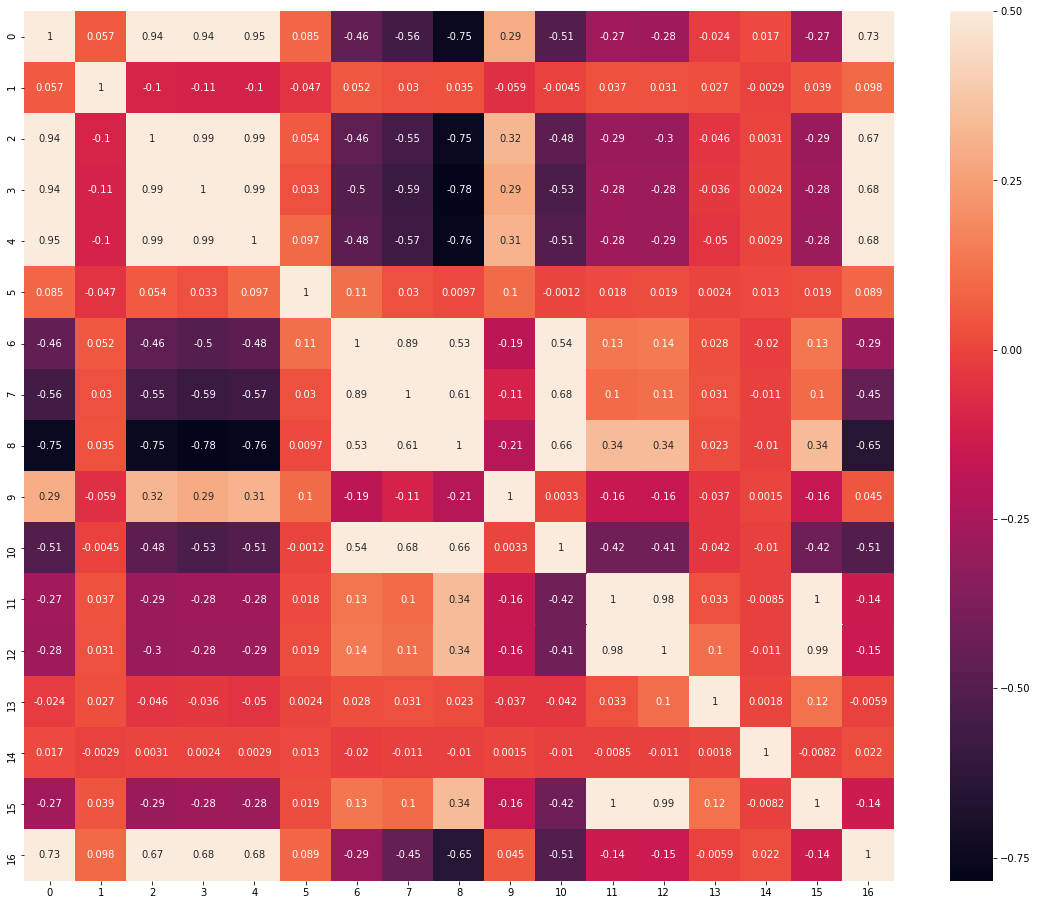

In [42]:
#https://machinelearningmastery.com/stateful-stateless-lstm-time-series-forecasting-python/
#https://machinelearningmastery.com/multi-step-time-series-forecasting-long-short-term-memory-networks-python/


# univariate multi-step vector-output stacked lstm example
# Importing the libraries
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional
from keras.layers import Dense
from numpy import hstack
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_squared_error
import seaborn as sns

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
session = tf.compat.v1.Session(config=config)

def plot_eval(real_stock_price, predicted_stock_price):
    print("sqrt mean_squared_error: ", sqrt(mean_squared_error(real_stock_price, predicted_stock_price)))
    print("mean_squared_error: ", mean_squared_error(real_stock_price, predicted_stock_price))
    mean_absolute_er = mean_absolute_error(real_stock_price, predicted_stock_price)
    print("mean_absolute_error: ", mean_absolute_er)
    
    #real_stock_price, predicted_stock_price
    SS_Residual = sum((real_stock_price-predicted_stock_price)**2)
    SS_Total = sum((real_stock_price-np.mean(real_stock_price))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(real_stock_price)-1)/(len(real_stock_price)-X_train.shape[1]-1)
    print ("R Squared:", r_squared, "\nAdjusted R Squared:", adjusted_r_squared)

    fig = plt.figure(figsize=(12,8))
    # Visualising the results
    plt.plot(real_stock_price, color = 'red',  marker='o', label = 'Real Stock Price')
    plt.plot(predicted_stock_price, color = 'blue',  marker='o', label = 'Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

def add_datepart(df, fldnames, drop=False, time=False, errors="raise"):	
    if isinstance(fldnames,str):
        fldnames = [fldnames]
    for fldname in fldnames:
        fld = df[fldname]
        fld_dtype = fld.dtype
        if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
            fld_dtype = np.datetime64
        if not np.issubdtype(fld_dtype, np.datetime64):
            df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
        #targ_pre = re.sub('[Dd]ate$', '', fldname)
        attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
                'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
        if time: attr = attr + ['Hour', 'Minute', 'Second']
        for n in attr: df[n] = getattr(fld.dt, n.lower())
        df['Elapsed'] = fld.astype(np.int64) // 10 ** 9
        if drop: df.drop(fldname, axis=1, inplace=True)
    df.drop(['Elapsed','Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'], axis=1, inplace=True)
        

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)


def calc_feat(sequence, n_steps_in, n_steps_out):
    X= []
    k = 0 # row itreator
    size = len(sequence)
    for i in range(n_steps_in, size):
        vwap = 0
        vol = 0
        vchg = 0
        for j in range(n_steps_in):
            if (k<i):
#                print("i:", i," j:",j)
#                print("High, Low, Close", sequence[k, 0:3])
#                print("Vol", sequence[k, 4])
#                print("Change", sequence[k, 3])
                vwap += (((np.sum(sequence[k, 0:3]))/3) * sequence[k, 4])
                vchg += (((sequence[k, 3])) * sequence[k, 4])
                vol += sequence[k, 4]
                k = k+1
 #               print("vwap:", vwap, " vchg", vchg)
        #if vwap !=0  and vol != 0:
        X = np.append(X, vwap/vol)
        X = np.append(X, vchg/vol)
    
    sz = size-(n_steps_in)
    
    X = np.array(X.reshape(sz,2)) 
    #X = X[:-(n_steps_out), :]
    return X


# load dataset
# Importing the training set
dataset_train = pd.read_csv('C:/Users/hmnsh/repos/datastuff/Minnean/marketdata/zsh20.csv') #, nrows=10
#dataset_train = dataset_train[dataset_train["Volume"] != 0]

dataset_dxy = pd.read_csv('C:/Users/hmnsh/repos/datastuff/Minnean/marketdata/DTWEXB.csv')
dataset_train = pd.merge(dataset_train, dataset_dxy,  left_on='Time', right_on='Time', how='left')
dataset_corn = pd.read_csv('./marketdata/zch20_daily_price-history-11-02-2019.csv')
dataset_train = pd.merge(dataset_train, dataset_corn,  left_on='Time', right_on='Time', how='left')
dataset_train.rename(columns={"DTWEXB": "USD", "Last": "SOYCLS", "Last_Corn": "CORNCLS"}, inplace=True)
#dataset_train.info()
dataset_train.drop(['Open_Corn', 'High_Corn', 'Low_Corn', 'Change_Corn', 'Volume_Corn', 'Open Int_Corn'], axis=1, inplace=True)
dataset_train.Time = pd.to_datetime(dataset_train.Time.str.replace('D', 'T'))
dataset_train = dataset_train.sort_values('Time')
#dataset_train = pd.merge(dataset_train, dtn,  left_on='Time', right_on='Time', how='left')
# choose a number of time steps
n_steps_in, n_steps_out = 4, 15

#dataset_train['MOVING_AVG'] = dataset_train.iloc[:,4].rolling(window=n_steps_out).mean().fillna(0)
#dataset_train['MOVING_SNT'] = dataset_train.iloc[:,9].rolling(window=1).mean().fillna(0)

add_datepart(dataset_train, 'Time')
dataset_train.set_index('Time', inplace=True)
print(dataset_train.shape)

# define input sequence
training_feat = dataset_train.iloc[:, 1:16].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (-1, 1))
training_feat_scaled = sc.fit_transform(training_feat)

#X_feat = calc_feat(training_feat, n_steps_in, n_steps_out)
X_feat = calc_feat(training_feat_scaled, n_steps_in, n_steps_out)

# define input sequence
training_set = dataset_train.iloc[:, 3:4].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (-1, 1))
raw_seq = sc.fit_transform(training_set)

# split into samples
X_whole, y_whole = split_sequence(raw_seq, n_steps_in, n_steps_out)

# summarize the data
#for i in range(len(X_whole)):
#	print(X_whole[i], y_whole[i])

X_whole = X_whole.reshape(X_whole.shape[0], X_whole.shape[1])
y_whole = y_whole.reshape(y_whole.shape[0], y_whole.shape[1])

#step2 model - drop 1st row
n_steps_out = 1
y_whole = y_whole[:,14:15]

trp_rows = X_feat.shape[0] - X_whole.shape[0]
if trp_rows>0:
    X_feat = X_feat[:-(trp_rows), :]
    training_feat_scaled = training_feat_scaled[:-(trp_rows+n_steps_in), :]
#Concate features
X_whole = hstack((X_whole, X_feat))
#Concate features
corr_whole = hstack((X_feat, training_feat_scaled))
corr_whole = hstack((corr_whole, y_whole))

cols = dataset_train.columns.values
#cols = np.append(cols, "vwap")
#cols = np.append(cols, "vol")
val = 'Time'
cols = cols.tolist()
if val in cols: cols.remove(val)
print(cols)
datafr = pd.DataFrame(corr_whole)

C_mat = datafr.corr()
fig = plt.figure(figsize=(20,16))
sns.heatmap(C_mat,vmax=0.5,square=True,annot=True)
plt.show()

In [43]:
cols = dataset_train.columns.values
val = 'Time'
cols = cols.tolist()
if val in cols: cols.remove(val)

print(len(cols))
print(cols)

datafr.var()

15
['Open', 'High', 'Low', 'SOYCLS', 'Change', 'Volume', 'Open Int', 'USD', 'CORNCLS', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear']


0     0.209333
1     0.063530
2     0.203579
3     0.212017
4     0.219383
5     0.063964
6     0.037120
7     0.145397
8     0.262389
9     0.101478
10    0.354799
11    0.379723
12    0.335861
13    0.339296
14    0.491785
15    0.326728
16    0.205929
dtype: float64